In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 

In [2]:
games = pd.read_pickle('datasets/cleaned_steam_games.pkl')
games

,name,all_reviews,release_date,release_date_epoch_days,developer,publisher,popular_tags,languages,mature_content,original_price,...,genre_Strategy,old_genre_Action,old_genre_Adventure,old_genre_Casual,old_genre_Massively Multiplayer,old_genre_RPG,old_genre_Racing,old_genre_Simulation,old_genre_Sports,old_genre_Strategy
0,DOOM,92,2016-05-12,16933,id Software,"Bethesda Softworks,Bethesda Softworks","[FPS, Gore, Action, Demons, Shooter, First-Per...","[English, French, Italian, German, Spanish - S...",False,19.99,...,0,1,0,0,0,0,0,0,0,0
1,PLAYERUNKNOWN'S BATTLEGROUNDS,49,2017-12-21,17521,PUBG Corporation,"PUBG Corporation,PUBG Corporation","[Survival, Shooter, Multiplayer, Battle Royale...","[English, Korean, Simplified Chinese, French, ...",True,29.99,...,0,1,1,0,1,0,0,0,0,0
2,BATTLETECH,71,2018-04-24,17645,Harebrained Schemes,"Paradox Interactive,Paradox Interactive","[Mechs, Strategy, Turn-Based, Turn-Based Tacti...","[English, French, German, Russian]",False,39.99,...,1,1,1,0,0,0,0,0,0,1
3,DayZ,61,2018-12-13,17878,Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","[Survival, Zombies, Open World, Multiplayer, P...","[English, French, Italian, German, Spanish - S...",False,44.99,...,0,1,1,0,1,0,0,0,0,0
4,EVE Online,74,2003-05-06,12178,CCP,"CCP,CCP","[Space, Massively Multiplayer, Sci-fi, Sandbox...","[English, German, Russian, French]",False,0.00,...,1,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40481,雨上がりのハナビィ Ameagari no Hanaby,100,2018-09-22,17796,Enigmatic Network,"Enigmatic Network,Enigmatic Network","[Indie, Adventure, Action, Casual, Sexual Cont...","[English, Japanese]",True,13.99,...,0,1,1,1,0,0,0,0,0,0
40524,Lil Big Invasion,100,2016-08-04,17017,Andreas Britten,"Andreas Britten,Andreas Britten","[Action, Indie, Adventure, Puzzle, Atmospheric...",[English],False,2.99,...,0,1,1,0,0,0,0,0,0,0
40598,Detached: Non-VR Edition,78,2018-07-24,17736,Anshar Studios,"Anshar Studios,Anshar Studios","[Simulation, Indie, Space, Exploration, Atmosp...","[English, French, German, Simplified Chinese, ...",False,14.99,...,0,0,0,0,0,0,0,1,0,0
40611,A Room Beyond,90,2017-06-13,17330,René Bühling,"René Bühling,René Bühling","[Adventure, Indie, Point & Click]","[English, German, French, Italian, Spanish - S...",False,7.99,...,0,0,1,0,0,0,0,0,0,0


## Dealing with NULL values

In [3]:
# Replace NaN values in column 'B' with the mode
games['publisher'] = games['publisher'].fillna(games['publisher'].mode().iloc[0])
games['developer'] = games['developer'].fillna(games['publisher'])

Response variable

In [4]:
games['all_reviews'] = pd.to_numeric(games['all_reviews'])
games['status'] = np.where(games['all_reviews'] >= 70, 'good', 'bad')

# Clustering data

## Dealing with categorical variables

Now, we are going to change our categorical data into numerical form by `OneHotEncoding` because our Machine Learning Models can only deal with numerical data.

`Linear Regression` and `Random Forest Regression `in `sklearn` do not handle categorical variables directly as a part of the current implementation. Thus, we will need to encode the levels of a categorical variable as integers. One way to encode nominal (unordered) categorical variables by integers is `OneHotEncoding`. 

### One Hot Encoding

In [5]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
games_cat = games[['publisher', 'developer']]
ohe.fit(games_cat)
games_cat_ohe = pd.DataFrame(ohe.transform(games_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(games_cat.columns))

# Check the encoded variables
games_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Columns: 13848 entries, publisher_ ,  to developer_黄昏フロンティア
dtypes: float64(13848)
memory usage: 1.2 GB


In [6]:
games_cat_ohe.head()

,"publisher_ ,","publisher_ AYE Technology, AYE Technology","publisher_ Aerosoft GmbH, Aerosoft GmbH","publisher_ Casual Trash Studios, Casual Trash Studios","publisher_ Expect Studio , Expect Studio","publisher_ Fazan, Fazan","publisher_ FobTi interactive, FobTi interactive","publisher_ GrabTheGames, GrabTheGames","publisher_ GungHo Online Entertainment America, Inc.\t, GungHo Online Entertainment America, Inc.\t","publisher_ Imbanova Entertainment Inc., Imbanova Entertainment Inc.",...,developer_边境游戏工作室,developer_铸城工作室,developer_阿正不经,developer_阿津,developer_阿达游戏,developer_陌上科技,developer_雷武游戏,"developer_風林火山工作室,東木酋長",developer_高考恋爱委员会,developer_黄昏フロンティア
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Since there are too many number of columns created from OneHotEncoding, it will create a substantial amount `noise` to distrub the Machine Learning process, hence we have to cluster them into some clusters to reduce to number of columns.

### K-means Clustering

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

alldeveloper = games_cat_ohe.filter(regex='^developer_')
allpublisher = games_cat_ohe.filter(regex='^publisher_')

def kMeansFunc(data, n_clusters):
    # Load the data

    # Standardize the data
    scaler = StandardScaler()
    data_std = scaler.fit_transform(data)

    # Create a k-means object with 3 clusters
    kmeans = KMeans(n_clusters= n_clusters, random_state=42)

    # Fit the k-means object to the data
    kmeans.fit(data_std)

    # Get the cluster labels
    labels = kmeans.labels_

    # Add the cluster labels to the original data
    data['Cluster'] = labels

    # Print the number of data points in each cluster
    print(data['Cluster'].value_counts())

In [8]:
kMeansFunc(alldeveloper, 15)

3     11574
4        19
2        18
10       14
1         8
9         3
8         3
14        3
0         2
13        2
11        2
7         1
12        1
6         1
5         1
Name: Cluster, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_19380\2443899734.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = labels


In [9]:
kMeansFunc(allpublisher, 10)

5    11594
8       17
7        9
6        8
2        8
1        5
3        4
4        4
9        2
0        1
Name: Cluster, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_19380\2443899734.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = labels


Since K-Means clustering gives such a unevenly distribution of data with most of the data having the same value, it is not meaningful at all by using K-Means clustering. Instead, we come out with another clustering method called Principal Component Analysis (PCA). By using PCA, we can achieve dimensionality reduction, information compression, data de-noising, and many more.

 ### Principal Component Analysis (PCA)

In [10]:
# Import PCA
from sklearn.decomposition import PCA

# PCA for publisher
X = allpublisher

# Create a PCA object with 5 components
pca = PCA(n_components=5)

# Fit the PCA model to the data
pca.fit(X)

# Transform the data using the PCA model
X_pca = pca.transform(X)

# Create a new DataFrame with the transformed data
publisher_pca = pd.DataFrame(X_pca, columns=["Publisher_PC1", "Publisher_PC2", "Publisher_PC3", "Publisher_PC4", "Publisher_PC5"])


publisher_pca.head()

,Publisher_PC1,Publisher_PC2,Publisher_PC3,Publisher_PC4,Publisher_PC5
0,-0.051392,0.003178,-0.016121,-0.011612,-0.027166
1,-0.045827,0.002767,-0.008356,-0.005268,-0.011944
2,-0.053120,0.003310,-0.022163,-0.016792,-0.040502
3,-0.047767,0.002908,-0.010244,-0.006615,-0.015094
4,-0.046005,0.002780,-0.008505,-0.005372,-0.012186


In [11]:
publisher_pca.describe()

,Publisher_PC1,Publisher_PC2,Publisher_PC3,Publisher_PC4,Publisher_PC5
count,1.165200e+04,1.165200e+04,1.165200e+04,1.165200e+04,1.165200e+04
mean,1.730597e-16,4.328850e-16,2.259888e-16,-7.611315e-17,-1.111493e-16
std,2.112917e-01,1.933835e-01,1.002239e-01,9.556562e-02,9.433161e-02
min,-1.000431e-01,-3.969582e+00,-9.495651e-02,-3.873015e-01,-4.690598e-02
25%,-4.636516e-02,2.754114e-03,-8.738844e-03,-5.480354e-03,-1.243851e-02
50%,-4.573878e-02,2.760464e-03,-8.283020e-03,-5.217729e-03,-1.171165e-02
75%,-4.565068e-02,2.805748e-03,-8.211634e-03,-5.168198e-03,-1.171165e-02
max,9.536761e-01,4.956760e+00,9.847588e-01,9.169952e-01,9.081807e-01


In [12]:
# PCA for developer

X = alldeveloper

# Create a PCA object with 5 components
pca = PCA(n_components=5)

# Fit the PCA model to the data
pca.fit(X)

# Transform the data using the PCA model
X_pca = pca.transform(X)

# Create a new DataFrame with the transformed data
developer_pca = pd.DataFrame(X_pca, columns=["Developer_PC1", "Developer_PC2", "Developer_PC3", "Developer_PC4", "Developer_PC5"])

developer_pca.head()

,Developer_PC1,Developer_PC2,Developer_PC3,Developer_PC4,Developer_PC5
0,-0.017084,-0.008048,-0.006018,-0.007520,-0.005594
1,-0.016929,-0.006306,-0.004263,-0.005300,-0.003524
2,-0.016948,-0.006482,-0.004424,-0.005508,-0.003715
3,0.991690,-0.007112,-0.005299,-0.006671,-0.005675
4,-0.016948,-0.006482,-0.004424,-0.005508,-0.003715


In [13]:
developer_pca.describe()

,Developer_PC1,Developer_PC2,Developer_PC3,Developer_PC4,Developer_PC5
count,1.165200e+04,1.165200e+04,1.165200e+04,1.165200e+04,1.165200e+04
mean,-2.068990e-16,-9.487681e-17,-1.483790e-18,3.971537e-18,-6.515746e-18
std,3.887828e-01,8.104822e-02,7.041170e-02,6.915300e-02,5.994112e-02
min,-3.013994e+00,-2.501815e-02,-1.324514e-01,-2.036463e-02,-1.529672e-02
25%,-1.693827e-02,-6.392475e-03,-4.262527e-03,-5.299525e-03,-3.524170e-03
50%,-1.690940e-02,-6.138585e-03,-4.112475e-03,-5.105848e-03,-3.352001e-03
75%,-1.690940e-02,-6.138585e-03,-4.112475e-03,-5.105848e-03,-3.352001e-03
max,1.097860e+01,9.933879e-01,9.872745e-01,9.861905e-01,9.959989e-01


In [14]:
# Concatenate developer pca and publisher pca
games_pca = pd.concat([developer_pca, publisher_pca], axis = 1) # PCA of publisher and developer

# Reset index of both pca
games_pca.set_index(games.index, inplace=True)

In [15]:
# Combining Numeric features with the OHE Categorical features
games_num = games[['original_price','discount_price', 'discount_percentage']] 
games_res = games[['status']]
games_ohe = games.filter(regex='^genre_') # consists of all genre

games_prediction = pd.concat([games_num, games_ohe, games_pca, pd.DataFrame(games['mature_content']), games_res], 
                           sort = False, axis = 1).reindex(index=games_num.index)

games_prediction

,original_price,discount_price,discount_percentage,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,...,Developer_PC3,Developer_PC4,Developer_PC5,Publisher_PC1,Publisher_PC2,Publisher_PC3,Publisher_PC4,Publisher_PC5,mature_content,status
0,19.99,14.99,25.012506,1,0,0,0,0,0,0,...,-0.006018,-0.007520,-0.005594,-0.051392,0.003178,-0.016121,-0.011612,-0.027166,False,good
1,29.99,29.99,0.000000,1,1,0,1,0,0,0,...,-0.004263,-0.005300,-0.003524,-0.045827,0.002767,-0.008356,-0.005268,-0.011944,True,bad
2,39.99,39.99,0.000000,1,1,0,0,0,0,0,...,-0.004424,-0.005508,-0.003715,-0.053120,0.003310,-0.022163,-0.016792,-0.040502,False,good
3,44.99,44.99,0.000000,1,1,0,1,0,0,0,...,-0.005299,-0.006671,-0.005675,-0.047767,0.002908,-0.010244,-0.006615,-0.015094,False,bad
4,0.00,0.00,0.000000,1,0,0,1,1,0,0,...,-0.004424,-0.005508,-0.003715,-0.046005,0.002780,-0.008505,-0.005372,-0.012186,False,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40481,13.99,13.99,0.000000,1,1,1,0,0,0,0,...,-0.004112,-0.005106,-0.003352,-0.045651,0.002754,-0.008212,-0.005168,-0.011712,True,good
40524,2.99,2.99,0.000000,1,1,0,0,0,0,0,...,-0.004112,-0.005106,-0.003352,-0.045651,0.002754,-0.008212,-0.005168,-0.011712,False,good
40598,14.99,14.99,0.000000,0,0,0,0,0,0,1,...,-0.004186,-0.005201,-0.003436,-0.045739,0.002760,-0.008283,-0.005218,-0.011827,False,good
40611,7.99,7.99,0.000000,0,1,0,0,0,0,0,...,-0.004112,-0.005106,-0.003352,-0.045651,0.002754,-0.008212,-0.005168,-0.011712,False,good


In [16]:
games_prediction.to_csv('games-prediction.csv')

# Data Resampling

## Balanced Resampling

In [17]:
# Upsample Bad to match Good
from sklearn.utils import resample

gamesBad = games_prediction[games_prediction.status == 'bad']
gamesGood = games_prediction[games_prediction.status == 'good']
 
# Upsample the Bad samples
gamesBad = resample(gamesBad, 
                        replace=True,                     # sample with replacement
                        n_samples=gamesGood.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
games_prediction_balanced = pd.concat([gamesGood, gamesBad])
 
# Check the ratio of the classes
games_prediction_balanced['status'].value_counts()

good    7562
bad     7562
Name: status, dtype: int64

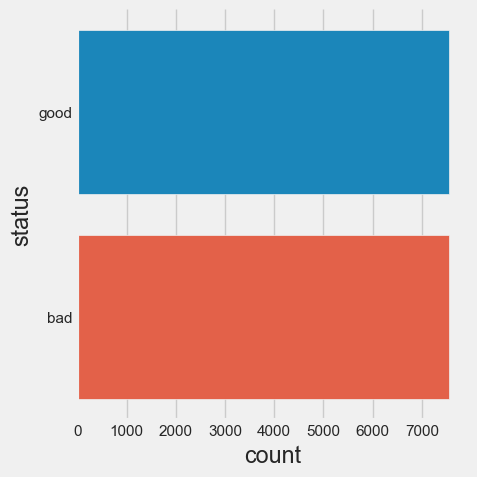

In [18]:
# Quick plot to check the balanced classes visually
sb.catplot(y = 'status', data = games_prediction_balanced, kind = "count")

In [19]:
games_prediction_balanced.isnull().sum()

original_price                 0
discount_price                 0
discount_percentage            0
genre_Action                   0
genre_Adventure                0
genre_Casual                   0
genre_Massively Multiplayer    0
genre_RPG                      0
genre_Racing                   0
genre_Simulation               0
genre_Sports                   0
genre_Strategy                 0
Developer_PC1                  0
Developer_PC2                  0
Developer_PC3                  0
Developer_PC4                  0
Developer_PC5                  0
Publisher_PC1                  0
Publisher_PC2                  0
Publisher_PC3                  0
Publisher_PC4                  0
Publisher_PC5                  0
mature_content                 0
status                         0
dtype: int64

In [20]:
games_prediction_balanced.to_csv('games-prediction-balanced-resampling.csv')

## Oversampling

In [21]:
# Import essential Oversampling module
from imblearn.over_sampling import RandomOverSampler

In [22]:
# Define oversampling strategy (creates 5:4 ratio)
over_smp = RandomOverSampler(sampling_strategy=0.8, random_state=20)

# Define X and y
X = games_prediction.drop('status', axis = 1)
y = games_prediction['status']

# Fit and apply the transform
X_oversampled, y_oversampled = over_smp.fit_resample(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [23]:
print("Good vs Bad Games Proportion (After oversampling)")
print(y_oversampled.value_counts()[0], ':', y_oversampled.value_counts()[1])

Good vs Bad Games Proportion (After oversampling)
7562 : 6049


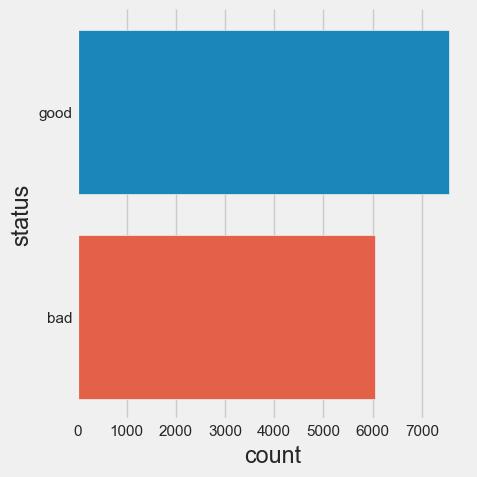

In [24]:
# Combine the two classes back after upsampling
games_prediction_oversampling = pd.concat([X_oversampled, pd.DataFrame(y_oversampled)], axis = 1)
 
# Quick plot to check the balanced classes visually
sb.catplot(y = 'status', data = games_prediction_oversampling, kind = "count")

In [25]:
games_prediction_oversampling.to_csv('games-prediction-over-resampling.csv')

## Visualization of resampled data

In [26]:
games_balanced_resampled = pd.read_csv('games-prediction-balanced-resampling.csv',index_col= 0)
games_over_resampled = pd.read_csv('games-prediction-over-resampling.csv',index_col= 0)
games_original_ratio = pd.read_csv('games-prediction.csv',index_col=0)



Text(0.5, 0, 'Status - Balanced sampled')

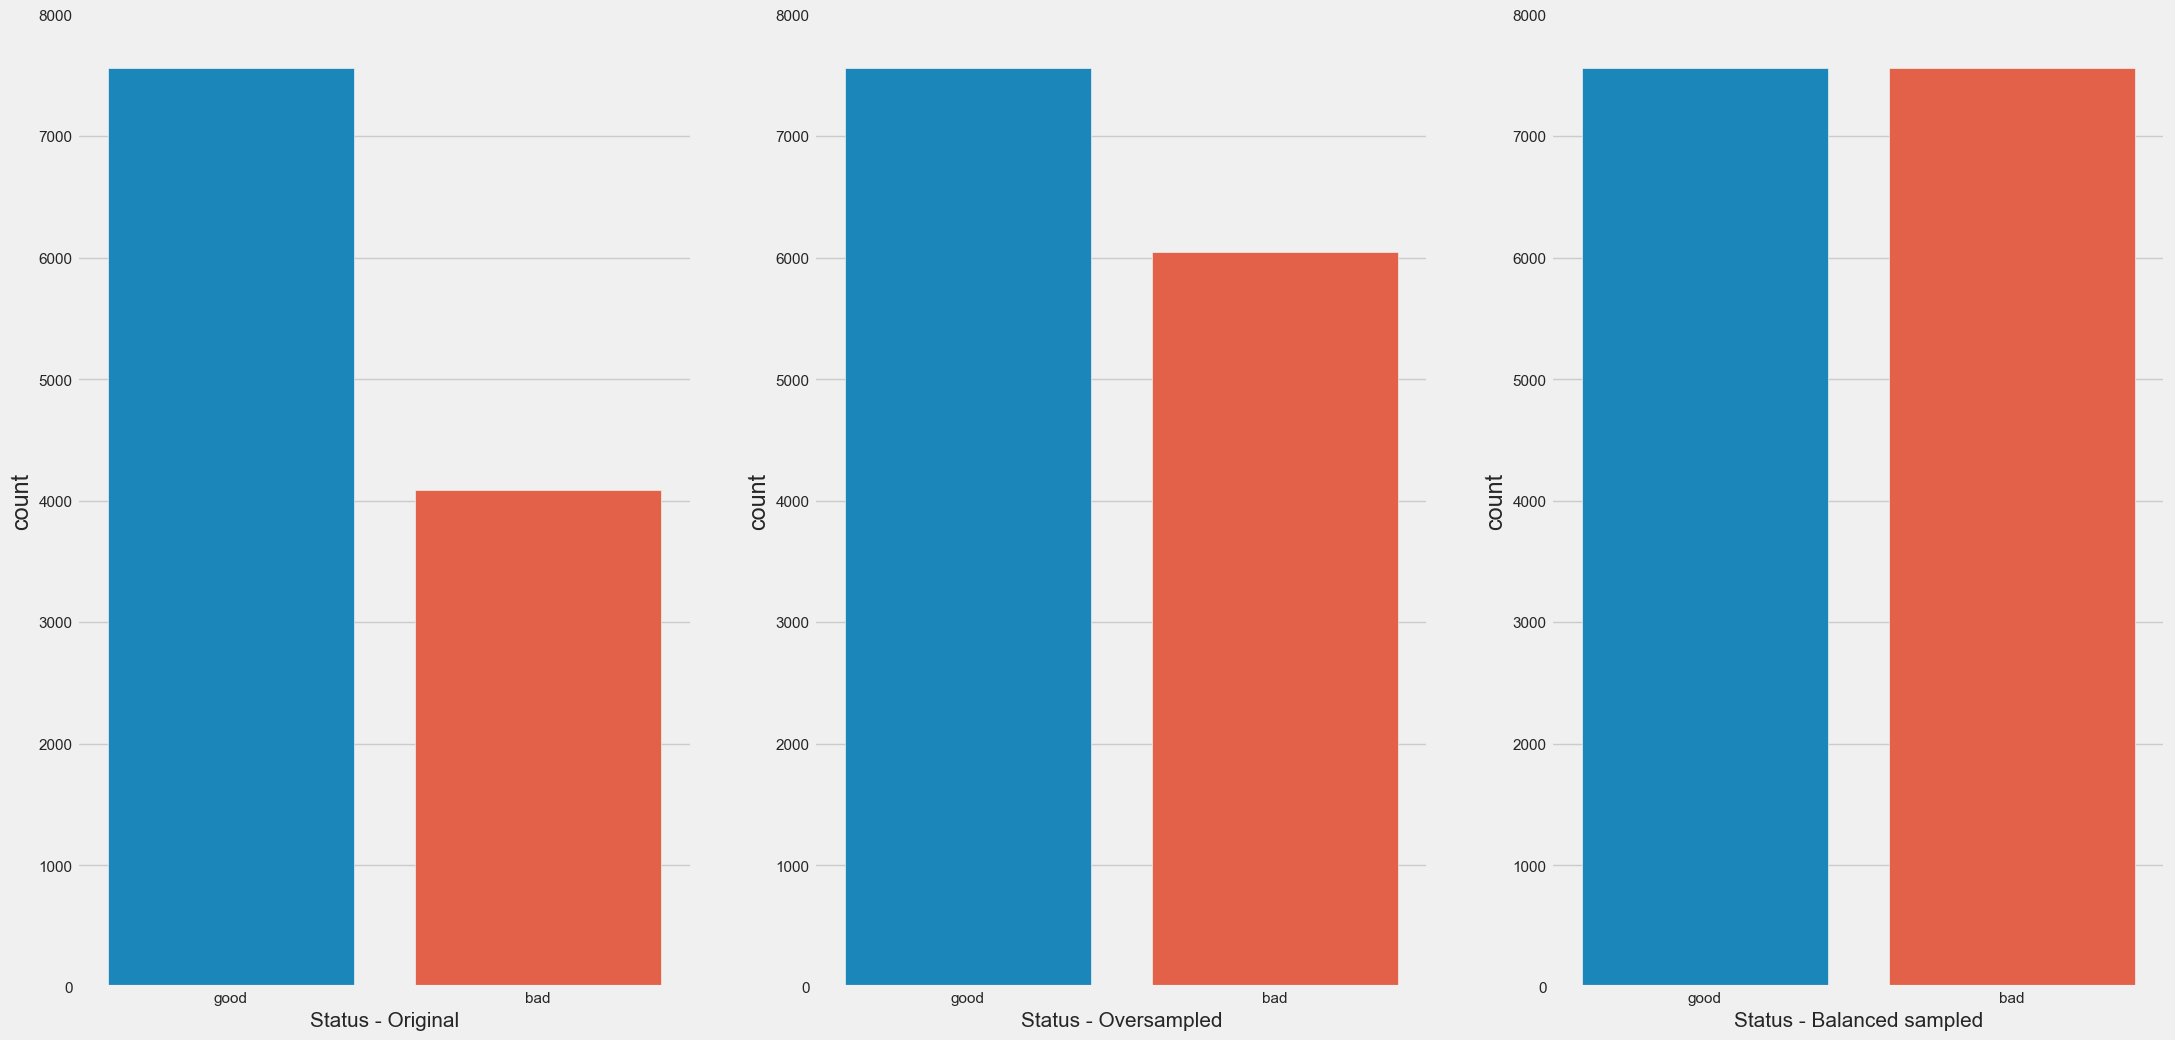

In [27]:
fig, axes =plt.subplots(1,3,figsize=(24,12))
plt.setp(axes,ylim=(0,8000))

sb.countplot(x=games_original_ratio['status'], ax=axes[0])
ax = axes[0]
ax.set_xlabel("Status - Original",fontsize=15)

sb.countplot(x=games_over_resampled['status'], ax=axes[1])
ax = axes[1]
ax.set_xlabel("Status - Oversampled",fontsize=15)

sb.countplot(x=games_balanced_resampled['status'], ax=axes[2])
ax = axes[2]
ax.set_xlabel("Status - Balanced sampled",fontsize=15)


